In [1]:
# DSC 630
# Assignment Week 4
# Author :  Akila Selvaraj
# Created Date : 09/23/2022

# Change log
# Author: Akila Selvaraj
# Description : In this project, we are going to apply clustering methods on ALS patients dataset

In [2]:
# importing libraries
import numpy as np
import pandas as pd
# import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
# Importing dataset
als_data_df=pd.read_csv('als_data.csv')
als_data_df.info

<bound method DataFrame.info of         ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0        1        65         57.0            40.5         38.0       0.066202   
1        2        48         45.0            41.0         39.0       0.010453   
2        3        38         50.0            47.0         45.0       0.008929   
3        4        63         47.0            44.0         41.0       0.012111   
4        5        63         47.0            45.5         42.0       0.008292   
...    ...       ...          ...             ...          ...            ...   
2218  2419        33         50.0            49.0         45.0       0.008772   
2219  2420        61         47.0            45.0         42.0       0.009074   
2220  2421        47         46.0            44.0         41.0       0.012111   
2221  2422        37         49.0            44.0         39.0       0.017857   
2222  2424        48         48.0            45.0         40.0       0.018476

In [4]:
# Remove any data that is not relevant to the patient’s ALS condition.
# Removing columns ID which is not relevant to patient's condition. So, dropping that column from our dataset.
als_data_df = als_data_df.drop(['ID'], axis=1)

In [5]:
# Importing train_test_split to split the data
from sklearn.model_selection import train_test_split

In [6]:
# Apply a standard scalar to the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [7]:
# importing libraries required for Clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

import matplotlib.cm as cm

In [8]:
# Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.
range_n_clusters = list (range(2,8)) #Initializing range of clusters from 2 to 7
print ("Number of clusters from 2 to 7: \n", range_n_clusters)

# Calculating silhoutte score for clusters from 2 to 7
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
#     preds = clusterer.fit(als_data_df)
    preds = clusterer.fit_predict(als_data_df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(als_data_df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

Number of clusters from 2 to 7: 
 [2, 3, 4, 5, 6, 7]
For n_clusters = 2, silhouette score is 0.6303941858456936)
For n_clusters = 3, silhouette score is 0.5909974863962754)
For n_clusters = 4, silhouette score is 0.5792587407129604)
For n_clusters = 5, silhouette score is 0.5615192284317249)
For n_clusters = 6, silhouette score is 0.5465025589027335)
For n_clusters = 7, silhouette score is 0.5528675762203219)


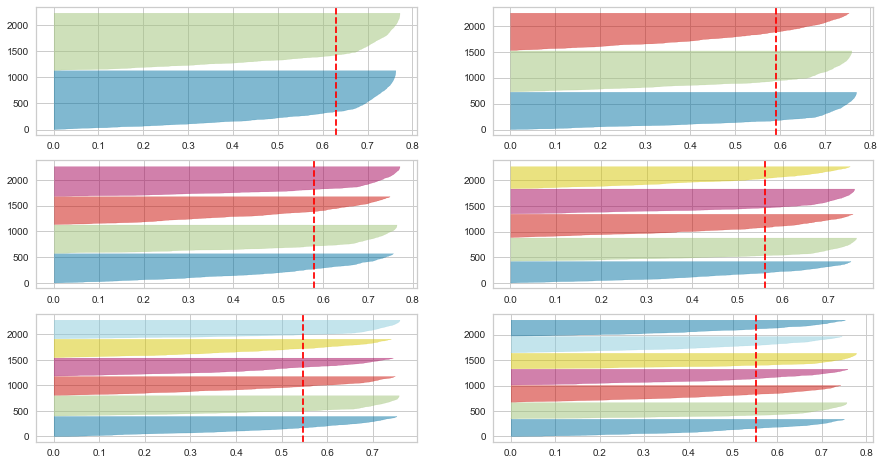

In [9]:
# Plotting for various cluster size

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6 ,7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(als_data_df)   # Fit the data to the visualizer

In [10]:
# Use the plot created in (3) to choose on optimal number of clusters for K-means. Justify your choice.

The silhouette score for each cluster is above average silhouette scores in all the plots. 
Also, the fluctuation in size is similar. For the plot with n_cluster 4, the thickness is more uniform than other plots
I would say that optimal number of clusters is 4.

In [11]:
# Fit a K-means model to the data with the optimal number of clusters chosen in part (4).
model = KMeans(n_clusters=4, random_state=42) 
als_kmeans = model.fit(als_data_df)
als_kmeans.labels_

array([3, 3, 3, ..., 1, 1, 1])

In [12]:
# Fit a PCA transformation with two features to the scaled data.
from sklearn.decomposition import PCA

Original number of features: 100
Reduced number of features: 2


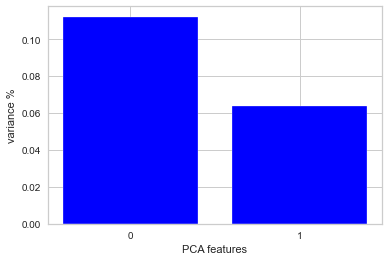

In [13]:
# Standardize the data to have a mean of ~0 and a variance of 1
als_df_std = StandardScaler().fit_transform(als_data_df)
# Create a PCA instance: pca
# We’ll employ PCA to reduce the number of features in our data set.
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(als_df_std)
# Plot the explained variances
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Show results
print("Original number of features:", als_df_std.shape[1])
print("Reduced number of features:", principalComponents.shape[1])

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

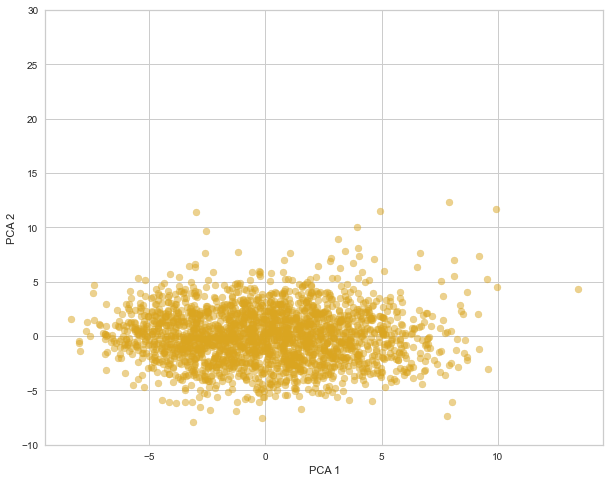

In [14]:
# let's visualise the first 2 projection components as a 2D scatter plot 
# to see if we can get a quick feel for the underlying data.
plt.figure(figsize = (10,8))
plt.scatter(principalComponents[:,0],principalComponents[:,1], c='goldenrod',alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.ylim(-10,30)
plt.show()

We’ll incorporate the newly obtained PCA scores in the K-means algorithm. 
That's how we can perform segmentation based on principal components instead of the original features

A simple KMeans will now be applied to the PCA projection data. Each cluster will be visualised with a different colour so hopefully we will be able to pick out clusters by eye.

To start off, we set up a KMeans clustering with sklearn's KMeans() and call the "fit_predict" method to compute cluster centers and predict cluster indices for the first and third PCA projections (to see if we can observe any appreciable clusters). We then define our own colour scheme and plot the scatter diagram as follows:

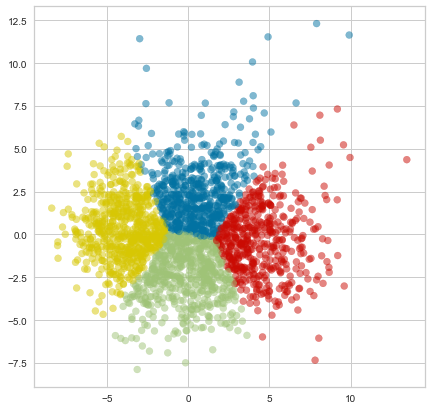

In [15]:
# Set a 4 KMeans clustering
kmeans = KMeans(n_clusters=4)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(principalComponents)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b',3:'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(principalComponents[:,0],principalComponents[:,1], c= label_color, alpha=0.5) 
plt.show()

This KMeans plot looks more promising now as if our simple clustering model assumption turns out to be right, we can observe 4 distinguishable clusters via this color visualisation scheme.

# Summarize your results and make a conclusion.
In this project, we focused on K-means clustering and Principal Component Analysis (PCA). We combined Principal Components Analysis (PCA) and K-means Clustering to improve segmentation results.
Clustering is a widely used exploratory tool, whose main task is to identify and group similar objects together.

The als data set we used in this project for comprises 2223 observations and 101 features. More specifically, it contains information about 2223 individuals and has their IDs, as well as their als patient related features, such as Age, Albumin, etc.

To determine the number of clusters, We created plot of silhoutte score versus the number of clusters in K-Means cluster. From the plot, I believe that optimal number of cluters for this dataset would be 4 as the thickness is uniform for the cluster size of 4.

Next, We did a dimensionality reduction step using PCA prior to data segmentation. By reducing the number of features, we can  improve the performance. Also, by decreasing the number of features the noise can also be reduced. First, we standardized the data using PCA. Then, we performed PCA with the number of components as two. Then, We incorporated the newly obtained PCA scores in the K-means algorithm. That's how we performed segmentation based on principal components scores instead of the original features.

Finally, we computed cluster centers and predict cluster indices. We plotted scatter plot by defining our own color map. In the scatter plot, we can see all four segments are clearly separated. 